---
title: Logistic regression - breast cancer classification 
jupyter: python3
---


Let us explore another regression model and apply that to the breast cancer dataset from `sklearn`. But first let us import the necessary libraries we need for this exercise.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Breast Cancer Dataset
The dataset contains 569 samples with 30 features derived from the images of breast mass cells. Each sample is labeled as either malignant (0) or benign (1).

For each feature, the dataset provides the mean, standard error, and "worst" (mean of the three largest values) measurements, resulting in 30 total features.

## Logistic Regression
[Logistic regression](https://en.wikipedia.org/wiki/Logistic_regression) functions as a supervised machine learning algorithm specifically designed for classification problems, commonly of a binary outcome (true/false, yes/no, 0/1). The primary purpose is to estimate the likelihood of an instance belonging to a particular class.


### Logistic Function
The core function used in logistic regression is the sigmoid function:\
$$\sigma(z)=\frac{1}{1+e^{-z}}$$

The logistic regression model calculates a linear combination of the $n$ input features: $z = w_0 + w_1x_1 + w_2x_2 + ... + w_nx_n$, where $w_0$ is the intercept and $w_1 \dots w_n$ are regression coefficients multiplied by some predictor values. It applies the sigmoid function to map this value to a probability: $P(y=1|x) = \sigma(z)$ and classifies an instance as positive (1) if the probability is greater than 0.5, and negative (0) otherwise.

### Advantages of Logistic Regression for Medical Diagnostics
Logistic regression is particularly useful for medical applications because:

- Interpretability: The coefficients tell us how each feature influences the prediction.
- Probabilistic output: Rather than just providing a binary prediction, it gives a probability score that can be used to assess confidence in the diagnosis.
- Efficiency: It works well with limited data and is computationally efficient.
- Regularization: This can be regularized to prevent overfitting, especially important when dealing with many features.

## Load dataset

Let us now load the dataset from sklearn along with some important in-built functions for analysing and training our model.

In [2]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc, precision_recall_curve

In [3]:
breast_cancer = load_breast_cancer()
X = breast_cancer.data
y = breast_cancer.target
feature_names = breast_cancer.feature_names
target_names = breast_cancer.target_names

# print to check the overall structure of our dataset
# and also to find how many classes we have

print(f"Dataset dimensions: {X.shape}")
print(f"Target classes: {target_names}")

Dataset dimensions: (569, 30)
Target classes: ['malignant' 'benign']


This shows that our dataset contains $569$ samples and $30$ features (rows and columns, respectively). 

The target class is malignant and benign, which means our goal should be to predict whether a sample is malignant or benign.

## Data Visualisation

Now that we have loaded our dataset let us inspect how they look like.

In [4]:
df = pd.DataFrame(X, columns=feature_names)
df['target'] = y
df['diagnosis'] = df['target'].map({0: 'malignant', 1: 'benign'})

print("\nData overview:")
print(df.head())

print("\nTarget distribution:")
print(df['diagnosis'].value_counts())


Data overview:
   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst perimeter  worst area  worst smoothnes

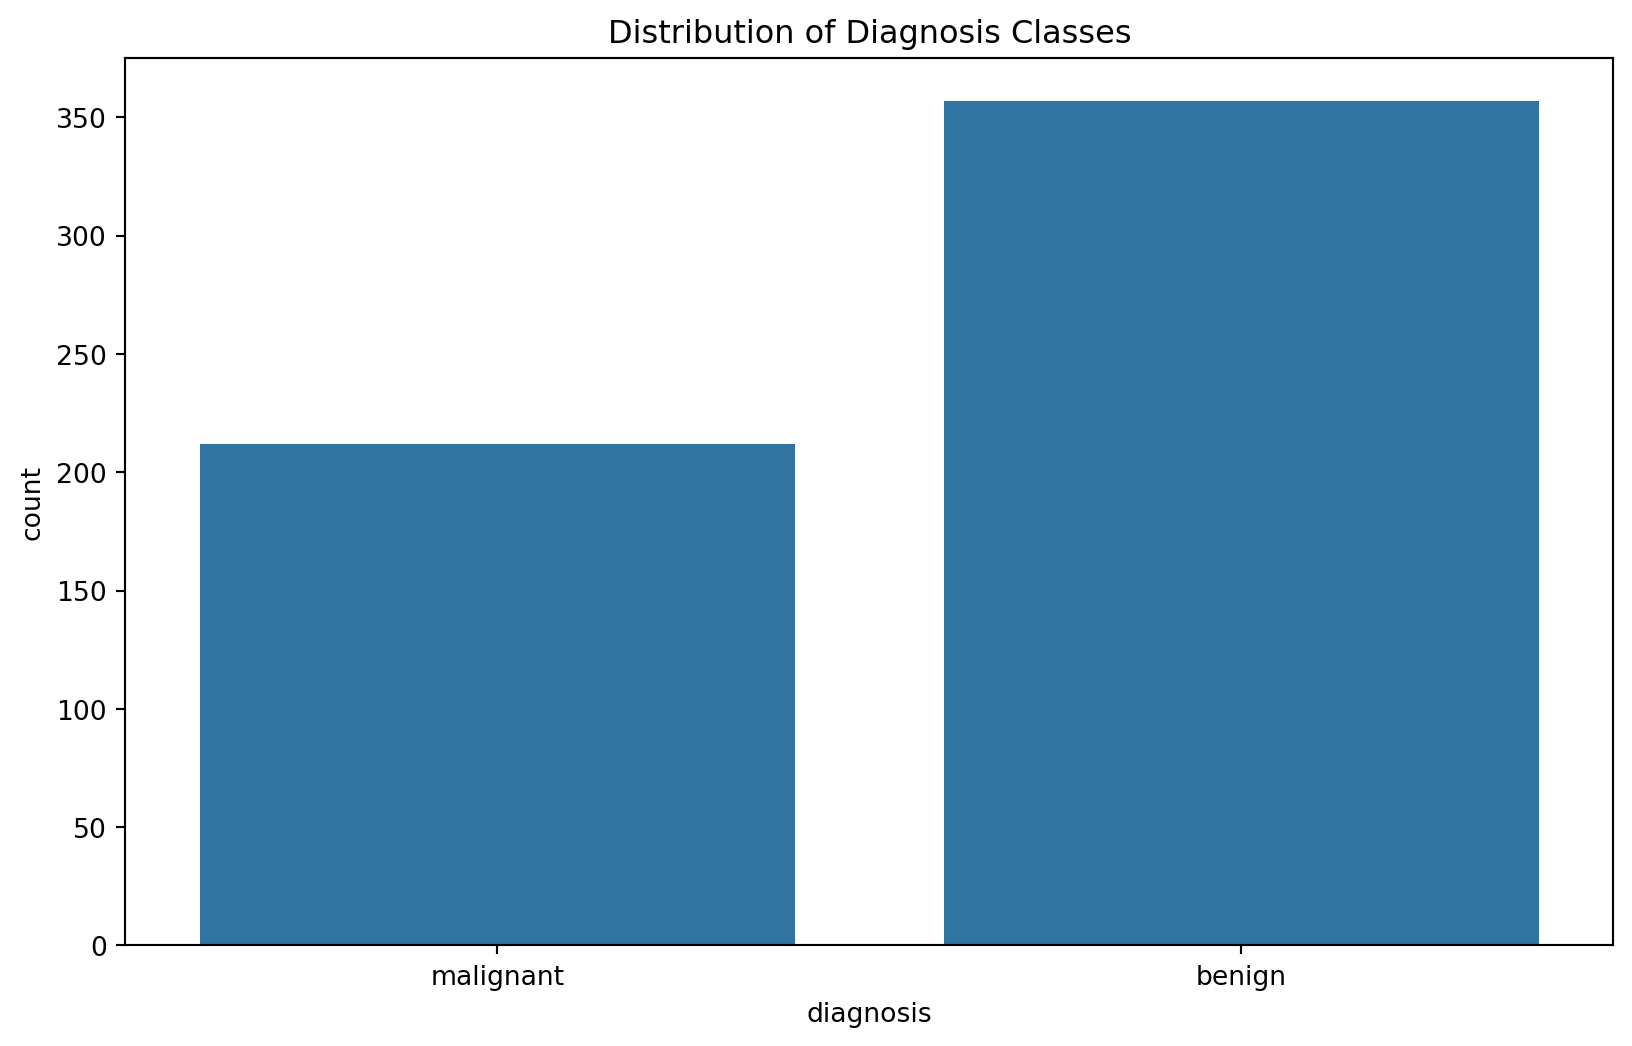

In [5]:
plt.figure(figsize=(10, 6))
sns.countplot(x='diagnosis', data=df)
plt.title('Distribution of Diagnosis Classes')
plt.show()

## Splitting dataset for training

To train the dataset, first we need to split it into two parts: training dataset and testing/validating dataset.

We can do so by using `train_test_split` and defining the size of test dataset as well as the random state to shuffle the dataset.

Training set shape: (426, 30)
Testing set shape: (143, 30)


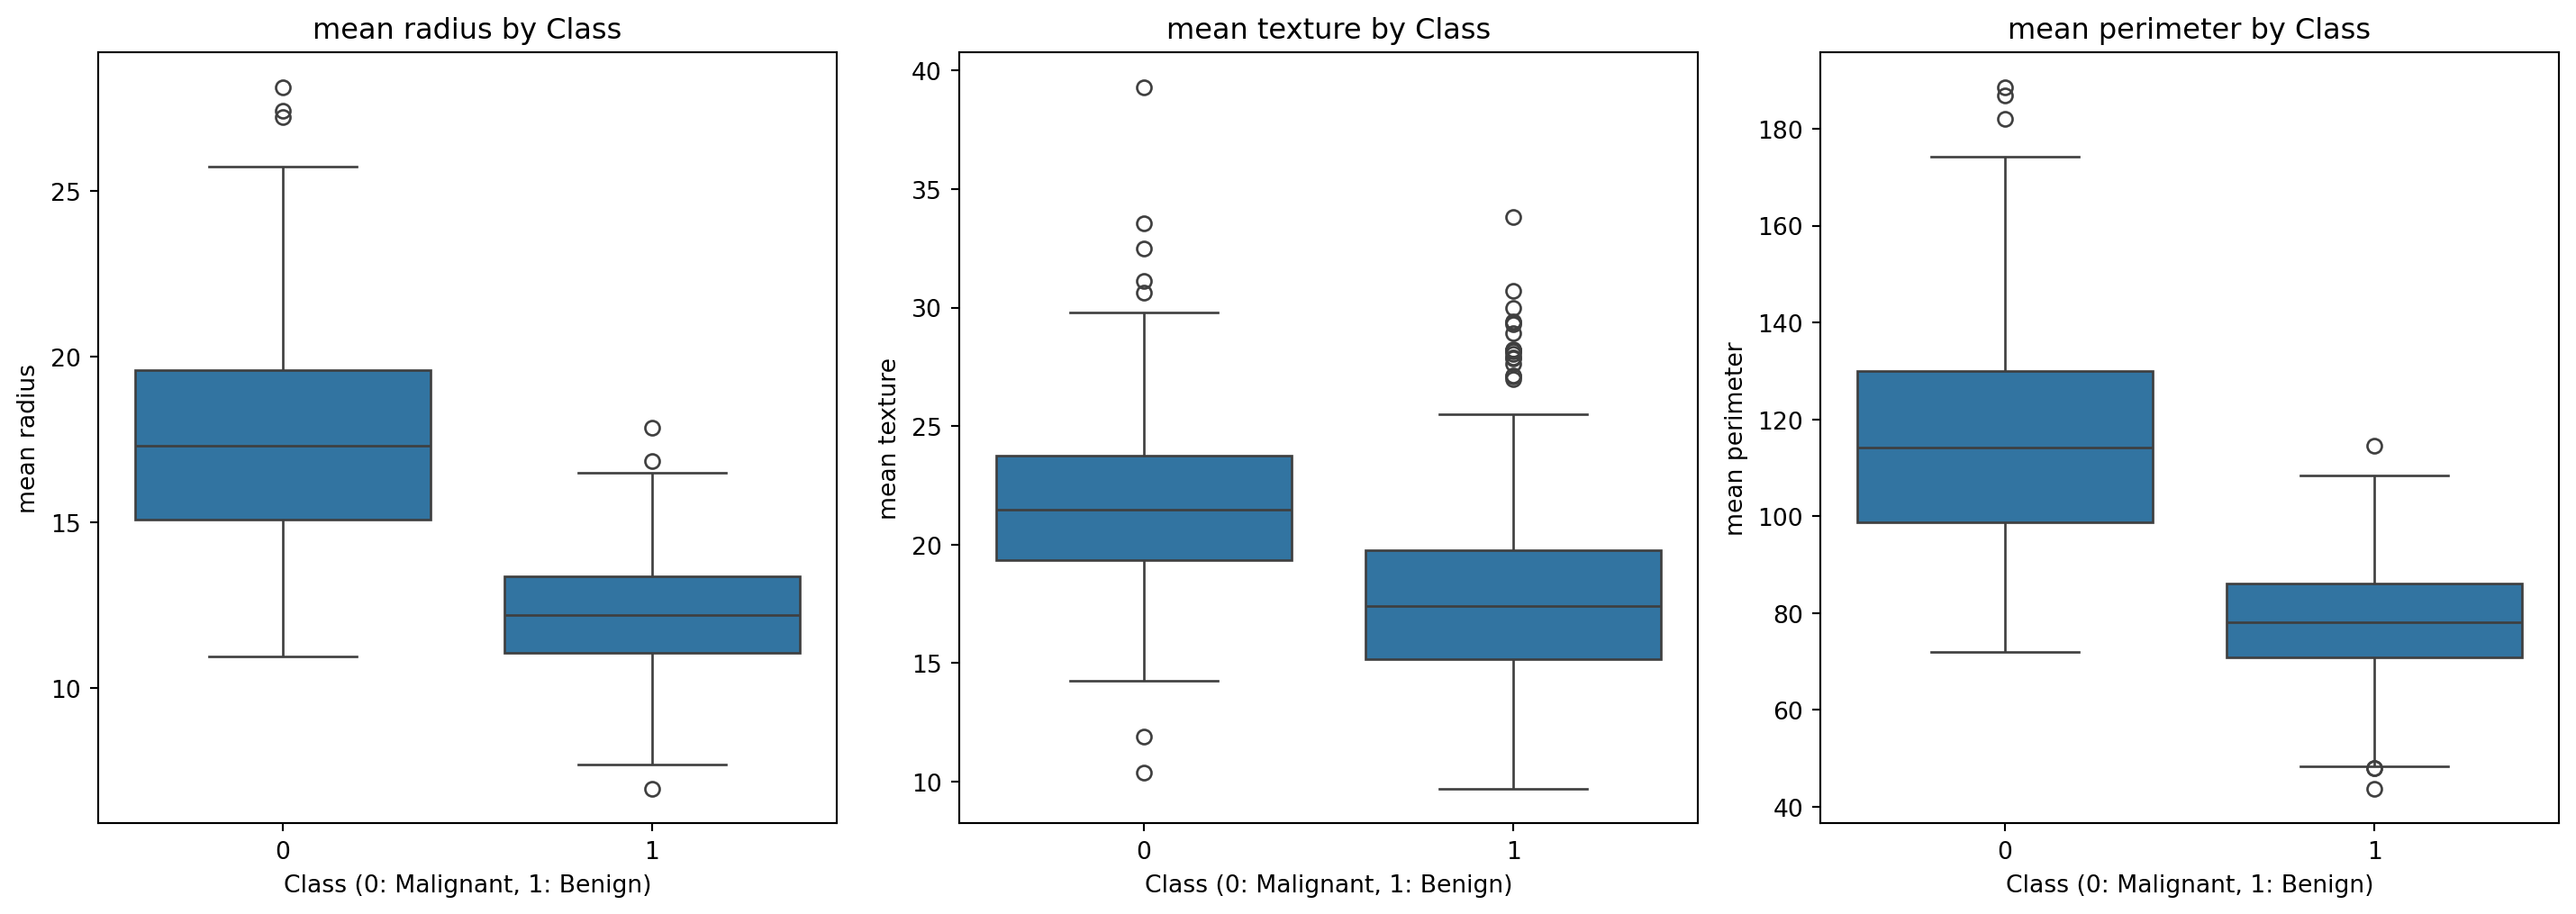

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

print(f"Training set shape: {X_train.shape}")
print(f"Testing set shape: {X_test.shape}")

# check feature distributions by class
plt.figure(figsize=(15, 10))
features_to_plot = ['mean radius', 'mean texture', 'mean perimeter']
for i, feature in enumerate(features_to_plot):
    plt.subplot(2, 3, i+1)
    sns.boxplot(x='target', y=feature, data=df)
    plt.title(f'{feature} by Class')
    plt.xlabel('Class (0: Malignant, 1: Benign)')
plt.tight_layout()
plt.show()

To verify if the training and testing data were split correctly ($75:25$ ratio), you can check is $143$ is $25\%$ of $569$.

Another approach to understand the relationship between features and tumour classifications (malignant vs. benign) is to visualise the means of each feature across both classes.

If you'd like to explore additional features, you can refer to the complete feature set available in the [Wisconsin Breast Cancer Diagnostic dataset](https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic).

## Scaling the dataset and fitting the model

Now that we have our dataset ready for training, let us fit the logistic regression model.

In [7]:
# initialise the scaler
# this is basically pre-processing of the data to standardise the features
scaler = StandardScaler()

# fit the scaler on training data
scaler.fit(X_train)

# transform both training and test data
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# fit the model and initialise and train a basic logistic regression model
model = LogisticRegression(random_state=42, max_iter=1000)
model.fit(X_train_scaled, y_train)

# evaluate the basic model
y_pred = model.predict(X_test_scaled)
print("\nLogistic Regression Results:")
print(classification_report(y_test, y_pred, target_names=['Malignant', 'Benign']))


Logistic Regression Results:
              precision    recall  f1-score   support

   Malignant       0.96      0.98      0.97        54
      Benign       0.99      0.98      0.98        89

    accuracy                           0.98       143
   macro avg       0.98      0.98      0.98       143
weighted avg       0.98      0.98      0.98       143



Here, we see four classification matrices of the model: precision, recall, f1-score, and support.

- **[Precision:](https://en.wikipedia.org/wiki/Precision_and_recall)**
Measures the accuracy of positive predictions. It is the ratio of true positives to all predicted positives. 
Here, a precision of $0.96$ for malignant means $96\%$ of tumors predicted as malignant were actually malignant.

- **[Recall:](https://en.wikipedia.org/wiki/Precision_and_recall)**
It is the ratio of true positives to all actual positives. A recall of $0.98$ for malignant means the model identified $98\%$ of all malignant tumors. 

- **[F1-Score:](https://en.wikipedia.org/wiki/F-score)**
The harmonic mean of precision and recall provides a balance between these two sometimes competing metrics. 
An F1-score of $0.97$ for malignant indicates an excellent balance between identifying positive cases and avoiding false alarms.

- **[Support:](https://www.scikit-yb.org/en/latest/api/classifier/classification_report.html)**
The actual number of samples in each class within the dataset being evaluated. 
The support values ($54$ malignant, $89$ benign) provide context for interpreting the other metrics and indicate the relative frequency of each class in the test data.

## Cross Validation

Cross-validation helps us estimate how well our model will generalise to new data by the following measures:

- Dividing the training data into multiple subsets (folds)
- Training and testing/validating the model on different combinations of these folds
- Averaging the results to get a more reliable performance estimate

In [8]:
cv_scores = cross_val_score(LogisticRegression(random_state=42, max_iter=1000), 
                           X_train_scaled, y_train, cv=5, scoring='accuracy')
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean CV accuracy: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")

Cross-validation scores: [0.98837209 0.96470588 1.         0.96470588 0.95294118]
Mean CV accuracy: 0.9741 ± 0.0173


As we had 5-fold cross-validation, we see $5$ different scores in each fold. And the average accuracy is around $97\%$.

## Visualise Model Performance
A [confusion matrix](https://www.w3schools.com/python/python_ml_confusion_matrix.asp) is a performance evaluation tool that provides a detailed breakdown of correct and incorrect predictions for each class, allowing you to assess the performance of your classification model. The rows represent the actual classes the outcomes should have been. While the columns represent the predictions we have made. Using this table it is easy to see which predictions are wrong.

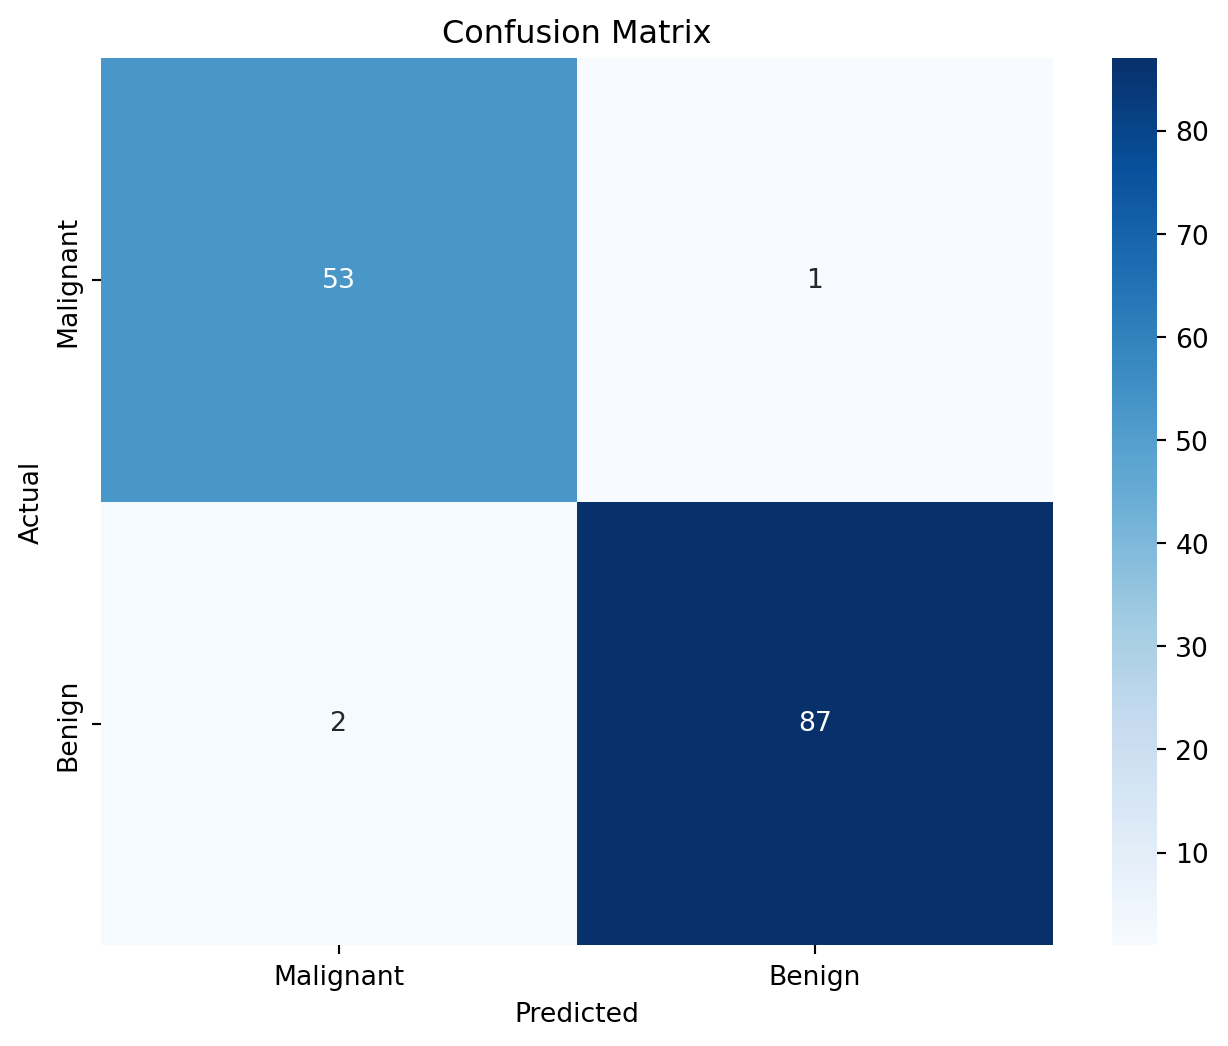

In [9]:
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Malignant', 'Benign'],
            yticklabels=['Malignant', 'Benign'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

From this confusion matrix, we learn how the binary classification model predicts cases of malignant and benign.

In true positive category we have $53$ cases as malignant while $1$ malignant case was incorrectly classified as benign.
But we don't have any false positive or true negative predictions.
